In [1]:
from libs.util import *
from libs.dynamic import *
from libs.factory import *
import networkx as nx
import pysindy as ps
from scipy.optimize import curve_fit

In [102]:
dynamic = 'bio'  # bio, population
topology = 'small_world'  # erdos_renyi, small_world, barabashi, scale_free

number_of_nodes = 10
dt = .01
alpha = 2
perturbed_node = 8
x0 = np.random.rand(number_of_nodes) * 100

## Original Dynamic

In [151]:
graph = get_graph(number_of_nodes, topology)
func = get_dynamic_function(dynamic)
custom_library = get_custom_library(dynamic)

x_train = create_dataset(graph, func, x0, dt)
train_steady_state = find_steady_state(x_train)                
train_perturbed = create_perturbed_state(alpha, perturbed_node, train_steady_state)
x_train_perturbed = apply_perturbation_by_function(func, train_perturbed, dt)
perturbed_train_steady_state = find_steady_state(x_train_perturbed)
x_train_flow = flow(x_train_perturbed)

# train_perturbed_full = train_steady_state * alpha
# g_matrix_train = calculate_g_by_function(train_perturbed_full, train_steady_state, func, dt)
# g_train_dist = find_matrix_dist(g_matrix_train)
# f_train, logf_train = calculate_f(g_matrix_train, graph.degree)

[(0, 5), (1, 2), (2, 3), (3, 5), (4, 5), (5, 2), (6, 2), (7, 5), (8, 5), (9, 6)]


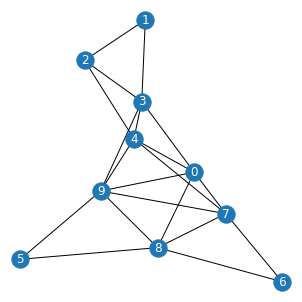

In [153]:
print(graph.degree)
plt.rcParams["figure.figsize"] = (4,4)
nx.draw(graph, with_labels=True, font_color='white')

## SINDy

In [117]:
model = ps.SINDy(feature_library=custom_library)
result = model.fit(x_train, t=dt)
# model.print()

In [124]:
x_test = generate_data_by_model(model, x_train[0], dt)
sindy_steady_state = find_steady_state(x_test)

print('train_steady_state:', train_steady_state)
print('sindy_steady_state:', sindy_steady_state)

train_steady_state: [0.64061541 0.3896145  0.46654404 0.24519957 0.56171062 0.4988679
 0.44300166 0.33129394 0.37969848 0.3037101 ]
sindy_steady_state: [0.29828514 0.29827679 0.29826856 0.29826046 0.29825247 0.29824461
 0.29823686 0.29822923 0.29822171 0.29821431]


In [131]:
sindy_perturbed = create_perturbed_state(alpha, perturbed_node, sindy_steady_state)
x_sindy_perturbed = apply_perturbation_by_model(model, sindy_perturbed, dt)
perturbed_sindy_steady_state = find_steady_state(x_sindy_perturbed)

print('perturbed_train_steady_state:', perturbed_train_steady_state)
print('perturbed_sindy_steady_state:', perturbed_sindy_steady_state)

perturbed_train_steady_state: [0.634558   0.3891107  0.46859661 0.24607335 0.5590651  0.49585283
 0.4402751  0.33221567 0.38182152 0.30405259]
perturbed_sindy_steady_state: [0.42803048 0.47915841 0.49821615 0.31688476 0.34503966 0.40637619
 0.40725447 0.40744889 0.28207134 0.4725823 ]


In [132]:
x_train_flow = flow(x_train_perturbed)
x_sindy_flow = flow(x_sindy_perturbed, 1)

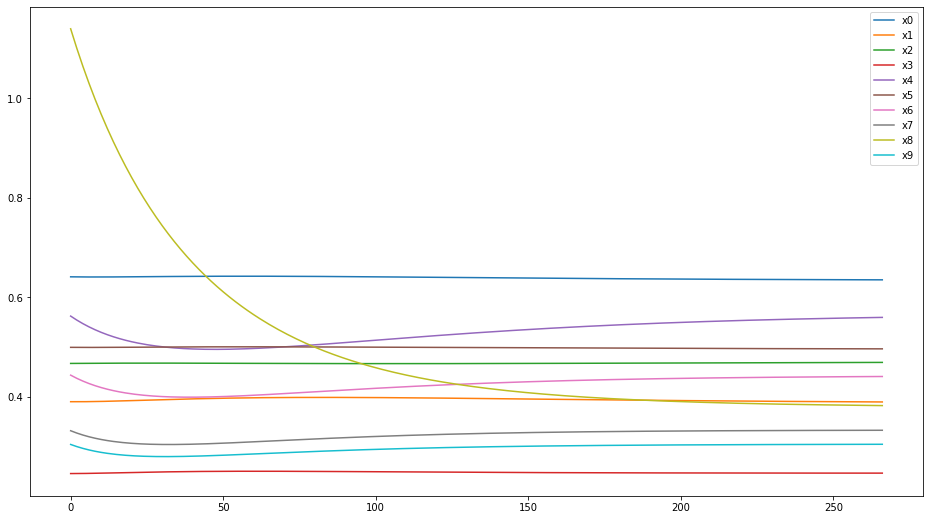

In [133]:
plot_flow(x_train_flow)

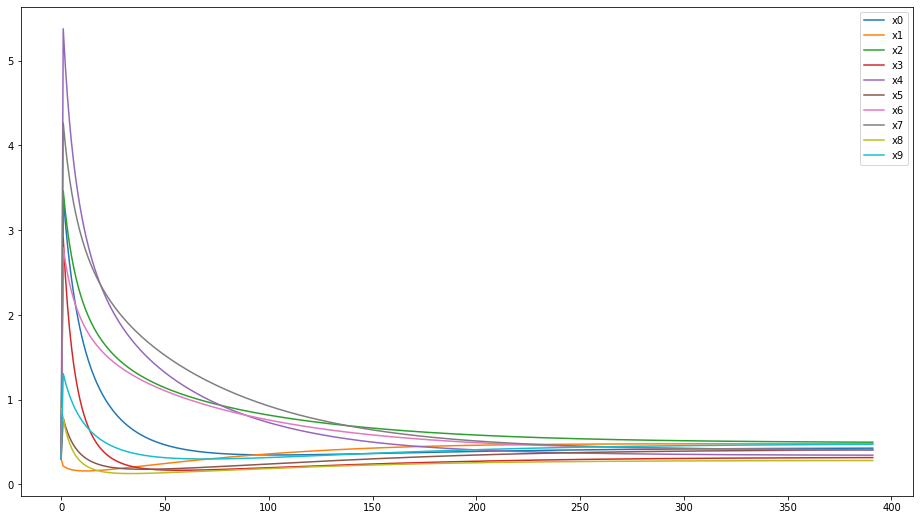

In [134]:
plot_flow(x_sindy_flow)

In [148]:
sindy_perturbed_full = sindy_steady_state * alpha
g_matrix_sindy = calculate_g_by_model(sindy_perturbed_full, sindy_steady_state, model, dt)
g_sindy_dist = find_matrix_dist(g_matrix_sindy)
f_sindy, logf_sindy = calculate_f(g_matrix_sindy, graph.degree)
gamma_list_sindy = calculate_gamma(g_matrix_sindy, graph)

<Figure size 1152x288 with 0 Axes>

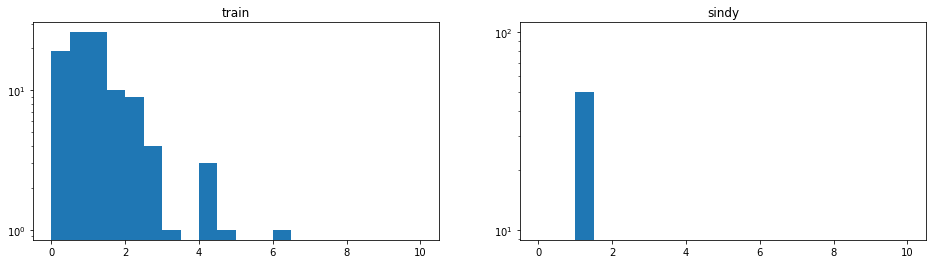

In [149]:
bins=20
range=(0,10)
plt.rcParams["figure.figsize"] = (16, 4)
plt.figure(2)
fig, axs = plt.subplots(1, 2)
axs[0].hist(g_train_dist, bins=bins, range=range, log=True)
axs[0].set_title('train')
axs[1].hist(g_sindy_dist, bins=bins, range=range, log=True)
axs[1].set_title('sindy')
plt.show()

In [150]:
print(f_train)
print(f_sindy)
print(logf_sindy)

plt.figure(4)
plt.rcParams["figure.figsize"] = (4,4)
plt.xlabel('S')
plt.ylabel('F')
for i in range(0,number_of_nodes):
    plt.plot(graph.degree[i], f_sindy[i], 'bo')

[0.82025463 0.87034293 0.87954852 0.94640873 0.85597953 0.87094468
 0.97014431 0.92491298 0.92185736 0.93960633]
[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan]


In [ ]:
print(gamma_list_sindy)

plt.figure(5)
plt.rcParams["figure.figsize"] = (4,4)
plt.xlabel('l')
plt.ylabel('Gamma')
for i, gamma in enumerate(gamma_list_sindy):
    plt.plot(i, gamma, 'bo')